In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

####Reimplement the normal distribution

In [4]:
def my_normal(x, the_mean, the_standard_deviation):
    temp = (x - the_mean) * (x - the_mean)
    temp1 = -temp/(2.0 * the_standard_deviation * the_standard_deviation)
    temp2 = np.exp(temp1)
    return (1.0/(the_standard_deviation * np.sqrt(2.0 * np.pi)))*temp2

####and compare it to the built in function

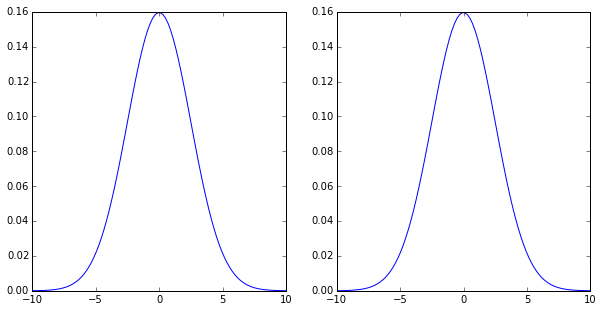

In [10]:
the_mean = 0.0
the_sd = 2.5

x = np.linspace(-10, 10, 100)
y = my_normal(x, the_mean, the_sd)

y1 = norm.pdf(x, loc=the_mean, scale=the_sd)

fig = plt.figure(figsize = (10, 5))
ax = plt.subplot(121)
ax.plot(x, y)

ax = plt.subplot(122)
ax.plot(x, y1)

####The function my_normal() or norm.pdf() represent a normal distribution over the random variable x
####However, they DO NOT return probabilities
####Probability is defined by the area under the curve and we estimate a probability by defining any integral over a slice

#####$P(x<0)$ is evaluated by taking the area under the curve to the left of 0

In [17]:
#So using the scipy stats function, we call the CUMULATIVE DISTRIBUTION FUNCTION to get the area to the left of 0.0
#We know in advance that the probability is 0.5
#With a mean of 0.0 half the area is to the left of the mean
p = norm.cdf(0.0, loc = 0.0, scale = 2.5)
print "P(x<0.0) = {:5.2f}".format(p)

P(x<0.0) =  0.50


####So the formula at the top of the Naive_Bayes_GaussainNB_Example notebook should be:

##$$f(x_{i}\text{ }|\text{ }y) = \frac{1}{\sqrt{2\pi\sigma^{2}_{y}}}\text{exp}\left(-\frac{\left(x_{i}-\mu_{y}\right)^{2}}{2\sigma^{2}_{y}} \right)$$

#####By using $p(x_{i}|y)$ implied it was estimating a probability (which it isn't)
#####Hence having values returned that exceed 1.0 is absolutely fine

####In the Bayes equation: $P(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}$ or $\text{Posterior } = \frac{Likelihood * Prior}{\text{Normalization}}$ the Likelihood function is a probability distribution over a random variable, but the function itself does NOT return a probability

####So $f(x_{i}|y)$ describes a (gaussian) probability distribution over $x$, but does not return probabilities.

####So the code in the notebook was correct and the values exceeding 1.0 do not represent probabilities and are also correct